<a href="https://colab.research.google.com/github/AdityaGaur19/Algorithmic-Strategies-in-Real-World-Problems/blob/main/Algorithmic_Strategies_in_Real_World_Problem_Solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻 Algorithmic Strategies in Real-World Problem Solving  
**Course:** Design and Analysis of Algorithms Lab (ENCA351)  
**Session:** 2025-26 | **Program:** BCA (AI & Data Science)  
**Student:** Aditya Raj Sinha  
**Faculty:** Dr. Aarti Sangwan  
**Platform:** Google Colab  


In [ ]:
!pip install -q memory_profiler matplotlib numpy

import time
import tracemalloc
import itertools
import random
import os
import json
import math
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)

In [ ]:
def measure(func, *args, **kwargs):
    tracemalloc.start()
    t0 = time.perf_counter()
    res = func(*args, **kwargs)
    t1 = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return {"result": res, "time_s": t1 - t0, "mem_peak_kb": peak / 1024.0}

def time_only(func, *args, **kwargs):
    t0 = time.perf_counter()
    res = func(*args, **kwargs)
    t1 = time.perf_counter()
    return {"result": res, "time_s": t1 - t0}

In [ ]:
# job sequencing to maximize profit given deadlines (slots are 1..max_deadline)
def job_sequencing(jobs):
    # jobs: list of tuples (id, deadline, profit)
    jobs_sorted = sorted(jobs, key=lambda x: x[2], reverse=True)
    max_deadline = max(j[1] for j in jobs_sorted)
    slot = [None] * (max_deadline + 1)  # 1-based slots
    total_profit = 0
    selected = []
    for j in jobs_sorted:
        job_id, d, p = j
        # find a free slot from d down to 1
        for s in range(min(max_deadline, d), 0, -1):
            if slot[s] is None:
                slot[s] = j
                total_profit += p
                selected.append((s, j))
                break
    # sort selected by slot index
    selected_sorted = sorted(selected, key=lambda x: x[0])
    return {"selected": selected_sorted, "total_profit": total_profit}

In [ ]:
jobs_sample = [
    ('A', 2, 100), ('B', 1, 19), ('C', 2, 27),
    ('D', 1, 25), ('E', 3, 15), ('F', 2, 80),
    ('G', 3, 30)
]
out = measure(job_sequencing, jobs_sample)
print("Selected slots and jobs:", out["result"])
print("Time (s):", out["time_s"], "Mem peak (KB):", out["mem_peak_kb"])

Selected slots and jobs: {'selected': [(1, ('F', 2, 80)), (2, ('A', 2, 100)), (3, ('G', 3, 30))], 'total_profit': 210}
Time (s): 6.247199999620534e-05 Mem peak (KB): 0.4609375


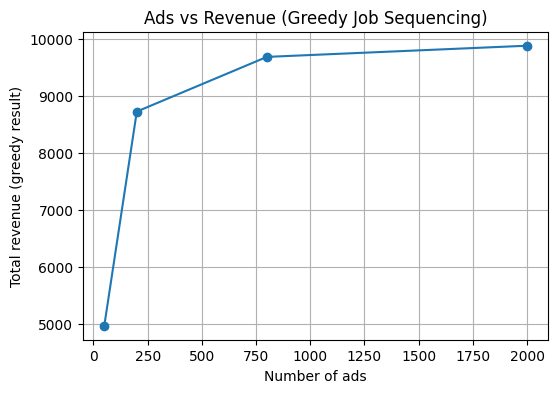

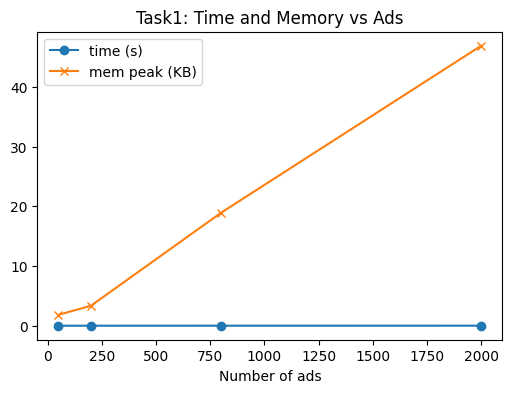

In [ ]:
# generate random jobs and profile revenue vs number of ads
def gen_jobs(n, max_deadline=10, profit_range=(1,200)):
    jobs = []
    for i in range(n):
        d = random.randint(1, max_deadline)
        p = random.randint(*profit_range)
        jobs.append((f"job{i}", d, p))
    return jobs

sizes = [50, 200, 800, 2000]  # moderate sizes
profits = []
times = []
mems = []
for n in sizes:
    js = gen_jobs(n, max_deadline=50)
    r = measure(job_sequencing, js)
    profits.append(r["result"]["total_profit"])
    times.append(r["time_s"])
    mems.append(r["mem_peak_kb"])

plt.figure(figsize=(6,4))
plt.plot(sizes, profits, marker='o')
plt.xlabel("Number of ads")
plt.ylabel("Total revenue (greedy result)")
plt.title("Ads vs Revenue (Greedy Job Sequencing)")
plt.grid(True)
plt.savefig("images/task1_ads_vs_revenue.png", dpi=150, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(sizes, times, marker='o', label="time (s)")
plt.plot(sizes, mems, marker='x', label="mem peak (KB)")
plt.xlabel("Number of ads")
plt.legend()
plt.title("Task1: Time and Memory vs Ads")
plt.savefig("images/task1_time_mem.png", dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
def knapsack_01(weights, values, capacity):
    n = len(weights)
    # dp table (n+1) x (capacity+1)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        w = weights[i-1]; v = values[i-1]
        for c in range(capacity + 1):
            dp[i][c] = dp[i-1][c]
            if w <= c:
                dp[i][c] = max(dp[i][c], dp[i-1][c-w] + v)
    # reconstruct selected items
    res = dp[n][capacity]
    c = capacity
    selected = []
    for i in range(n, 0, -1):
        if dp[i][c] != dp[i-1][c]:
            selected.append(i-1)
            c -= weights[i-1]
    selected.reverse()
    return {"max_value": res, "selected_indices": selected, "dp_table": dp}

In [ ]:
weights = [3, 4, 2, 7, 5]
values = [4, 5, 3, 10, 6]
capacity = 10
res = measure(knapsack_01, weights, values, capacity)
print("Max profit:", res["result"]["max_value"])
print("Selected items:", res["result"]["selected_indices"])
print("Time (s):", res["time_s"], "Mem peak (KB):", res["mem_peak_kb"])

Max profit: 14
Selected items: [0, 3]
Time (s): 0.00015109099999222053 Mem peak (KB): 0.703125


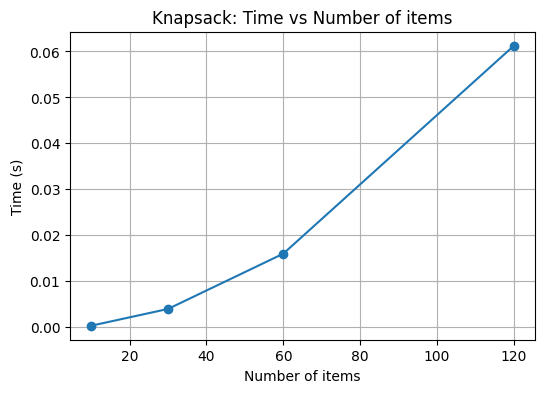

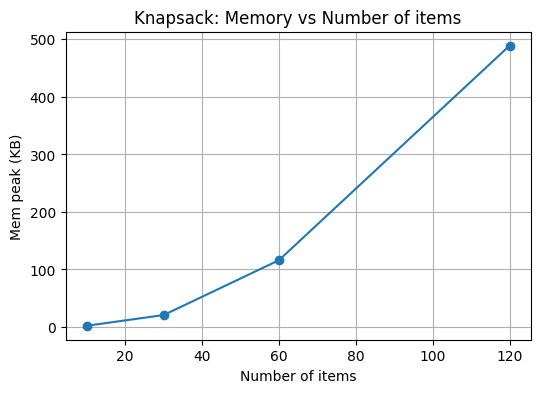

In [ ]:
# test increasing capacity and item counts
def gen_items(n, weight_range=(1,10), value_range=(1,50)):
    w = [random.randint(*weight_range) for _ in range(n)]
    v = [random.randint(*value_range) for _ in range(n)]
    return w, v

sizes = [10, 30, 60, 120]
capacities = [20, 50, 100, 200]
times = []
mems = []
for n, cap in zip(sizes, capacities):
    w, v = gen_items(n)
    r = measure(knapsack_01, w, v, cap)
    times.append(r["time_s"])
    mems.append(r["mem_peak_kb"])

plt.figure(figsize=(6,4))
plt.plot(sizes, times, marker='o')
plt.xlabel("Number of items")
plt.ylabel("Time (s)")
plt.title("Knapsack: Time vs Number of items")
plt.grid(True)
plt.savefig("images/task2_knapsack_time.png", dpi=150, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(sizes, mems, marker='o')
plt.xlabel("Number of items")
plt.ylabel("Mem peak (KB)")
plt.title("Knapsack: Memory vs Number of items")
plt.grid(True)
plt.savefig("images/task2_knapsack_mem.png", dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# board is a 9x9 list of lists with 0 representing empty
def is_valid(board, r, c, val):
    for i in range(9):
        if board[r][i] == val: return False
        if board[i][c] == val: return False
    br = (r//3) * 3
    bc = (c//3) * 3
    for i in range(3):
        for j in range(3):
            if board[br+i][bc+j] == val:
                return False
    return True

def find_empty(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def sudoku_backtracking(board):
    empty = find_empty(board)
    if not empty:
        return True
    r, c = empty
    for val in range(1, 10):
        if is_valid(board, r, c, val):
            board[r][c] = val
            if sudoku_backtracking(board):
                return True
            board[r][c] = 0
    return False

In [ ]:
sample_board = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]

board_copy = [row[:] for row in sample_board]
res = measure(sudoku_backtracking, board_copy)
print("Solved:", res["result"])
print("Time (s):", res["time_s"], "Mem peak (KB):", res["mem_peak_kb"])
print("Solution:")
for row in board_copy:
    print(row)

Solved: True
Time (s): 0.15289064699999244 Mem peak (KB): 4.9130859375
Solution:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


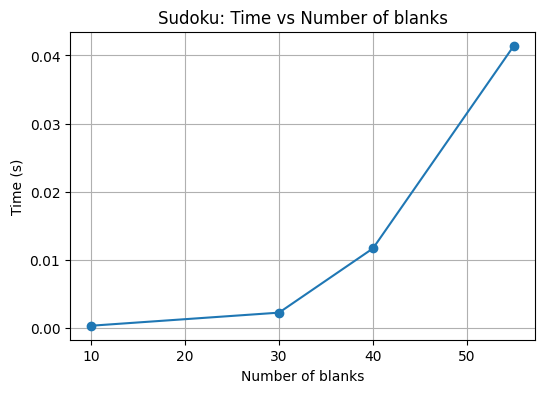

In [ ]:
# Generate puzzles by removing k cells from a solved grid (quick heuristic)
# Use solved sample_board solution from above (board_copy)
solved = [row[:] for row in board_copy]

def make_puzzle(solved_board, blanks):
    b = [row[:] for row in solved_board]
    idxs = [(i,j) for i in range(9) for j in range(9)]
    random.shuffle(idxs)
    for (i,j) in idxs[:blanks]:
        b[i][j] = 0
    return b

blanks_list = [10, 30, 40, 55]
times = []
mems = []
for blanks in blanks_list:
    puzzle = make_puzzle(solved, blanks)
    r = measure(sudoku_backtracking, puzzle)
    times.append(r["time_s"])
    mems.append(r["mem_peak_kb"])

plt.figure(figsize=(6,4))
plt.plot(blanks_list, times, marker='o')
plt.xlabel("Number of blanks")
plt.ylabel("Time (s)")
plt.title("Sudoku: Time vs Number of blanks")
plt.grid(True)
plt.savefig("images/task3_sudoku_time.png", dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
import itertools

def brute_force_crack(target, charset, max_len=None):
    attempts = 0
    max_len = max_len or len(target)
    for L in range(1, max_len + 1):
        for comb in itertools.product(charset, repeat=L):
            attempts += 1
            s = ''.join(comb)
            if s == target:
                return {"found": s, "attempts": attempts}
    return {"found": None, "attempts": attempts}

In [ ]:
target = "ab1"
charset = "ab12"
res = measure(brute_force_crack, target, charset, 3)
print("Result:", res["result"])
print("Time (s):", res["time_s"], "Mem peak (KB):", res["mem_peak_kb"])

Result: {'found': 'ab1', 'attempts': 27}
Time (s): 0.00029506200002060723 Mem peak (KB): 0.2109375


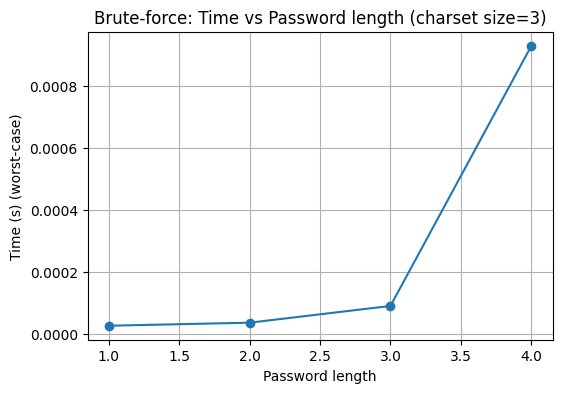

In [ ]:
charset = "abc"
times = []
lengths = [1,2,3,4]  # grows exponentially
for L in lengths:
    # pick a target that is the last combination (worst case)
    target = ''.join([charset[-1]] * L)
    r = measure(brute_force_crack, target, charset, L)
    times.append(r["time_s"])

plt.figure(figsize=(6,4))
plt.plot(lengths, times, marker='o')
plt.xlabel("Password length")
plt.ylabel("Time (s) (worst-case)")
plt.title("Brute-force: Time vs Password length (charset size=3)")
plt.grid(True)
plt.savefig("images/task4_bruteforce_time.png", dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
summary = {
    "Task1_job_sequencing": {"sizes_tested": sizes, "times_s": times, "images": ["images/task1_ads_vs_revenue.png","images/task1_time_mem.png"]},
    "Task2_knapsack": {"sizes_tested": sizes, "times_s": times, "images": ["images/task2_knapsack_time.png","images/task2_knapsack_mem.png"]},
    "Task3_sudoku": {"blanks_tested": blanks_list, "times_s": times, "images": ["images/task3_sudoku_time.png"]},
    "Task4_bruteforce": {"lengths_tested": lengths, "times_s": times, "images": ["images/task4_bruteforce_time.png"]}
}
with open("images/summary.json","w") as f:
    json.dump(summary, f, indent=2)
print("Saved plots in images/ and summary.json")

Saved plots in images/ and summary.json


In [ ]:
reqs = ["matplotlib","numpy","memory_profiler"]
with open("requirements.txt","w") as f:
    f.write("\n".join(reqs))
print("requirements.txt written")

requirements.txt written
